### C S 329E HW 4

## Pair Programming Group Number: 37
## Members of Team: Greg Mika, Chase Khan

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [2]:
df = pd.read_csv('melb_tree_train.csv')
df_X = df.drop(columns = 'Type')
s_y = df['Type']


## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [3]:
# calc_entropy(s_y) definition

def calc_entropy(s_y):
    dummies = s_y.str.get_dummies()
    entropy = 0
    for col in dummies.columns:
        p = sum(dummies[col])/len(s_y)
        entropy -= p*log2(p)
    return entropy

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [4]:
# The entire data set
calc_entropy(s_y)

1.5825333114261775

In [5]:
# Less than or equal to 200
split1 = s_y[ df['Landsize'] <= 200]
calc_entropy(split1)

1.3456432116206725

In [6]:
# Between 200 and 450
split2 = s_y[ (df['Landsize'] <= 450) & (df['Landsize'] > 200) ]
calc_entropy(split2)

1.4660501816027978

In [7]:
# greater than 450
split3 = s_y[ df['Landsize'] > 450]
calc_entropy(split3)

1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [8]:
def calc_gini( s_y ):
    dummies = s_y.str.get_dummies()
    gini = 1
    for col in dummies.columns:
        p = sum(dummies[col])/len(s_y)
        gini -= p**2
    return gini

    

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [9]:
# The entire data set
calc_gini(s_y)

0.6655601280292637

In [10]:
# Less than or equal to 200
split1 = s_y[ df['Landsize'] <= 200]
calc_gini(split1)

0.5741211482422965

In [11]:
# Between 200 and 450
split2 = s_y[ (df['Landsize'] <= 450) & (df['Landsize'] > 200) ]
calc_gini(split2)

0.6101021682602731

In [12]:
# greater than 450
split3 = s_y[ df['Landsize'] > 450]
calc_gini(split3)

0.4381934171597633

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [13]:
# Create Tree
from sklearn.tree import export_text

#one hot encode the df_X
council = df_X['CouncilArea'].str.get_dummies()
df_X_hot = df_X.drop(columns = 'CouncilArea')
for col in council.columns:
    df_X_hot[col] = council[col]


decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
decision_tree.fit(df_X_hot, s_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
# Display text version of the tree
s = tree.export_text(decision_tree, feature_names = list(df_X_hot.columns))
print(s)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



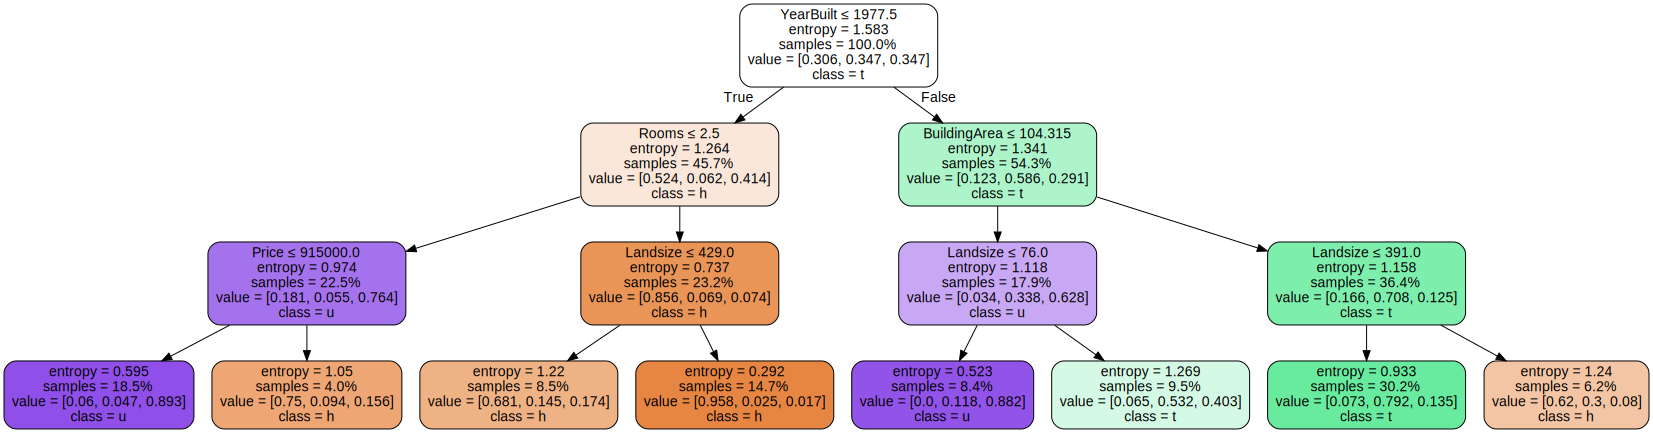

In [15]:
# Display graphviz version of the tree
target_names = list(s_y.str.get_dummies().columns)
dot_data = tree.export_graphviz(decision_tree, out_file= None, rounded = True, feature_names=list(df_X_hot.columns), filled=True, special_characters=True, class_names = ['h','t','u'], proportion = True)  
graph = graphviz.Source(dot_data)  
graph 

➡️ Answer containing your descriptive analytics in markdown here ⬅️

Generally when following the chart, duplexes are smaller and cheaper, while houses have a large land size and many rooms, and townhouses have a small landsize and mid-sized building area. Overall, it is hard to come up with definitive trends based on this table. 


## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [16]:
# Load in the test data
df_test = pd.read_csv('melb_tree_test.csv')
council = df_test['CouncilArea'].str.get_dummies()
df_x_test = df_test.drop(columns = ['Type', 'CouncilArea'])
for col in council.columns:
    df_x_test[col] = council[col]
s_y_test = df_test['Type']

In [17]:
# Build the trees using the training data
arr = np.arange(2,16)
error_test_gini = []
error_train_gini = []
error_test_entr = []
error_train_entr = []

for num in arr:
    decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=num)
    decision_tree.fit(df_X_hot, s_y)
    s_y_hat = decision_tree.predict(df_X_hot)
    err_train = ( s_y != s_y_hat ).sum()/len(s_y_hat)
    error_train_gini.append(err_train)
    s_y_hat_test = decision_tree.predict(df_x_test)
    err_test = (s_y_test != s_y_hat_test).sum()/len(s_y_test)
    error_test_gini.append(err_test)
    
for num in arr:
    decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=num)
    decision_tree.fit(df_X_hot, s_y)
    s_y_hat = decision_tree.predict(df_X_hot)
    err_train = ( s_y != s_y_hat ).sum()/len(s_y_hat)
    error_train_entr.append(err_train)
    s_y_hat_test = decision_tree.predict(df_x_test)
    err_test = (s_y_test != s_y_hat_test).sum()/len(s_y_test)
    error_test_entr.append(err_test)


Text(0.5, 1.0, 'Comparison of Error and Tree Depth with Different Impurity Methods')

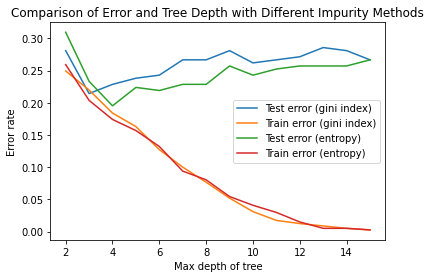

In [18]:
# Plot the 4 learning curves
plt.plot(arr, error_test_gini, label = 'Test error (gini index)')
plt.plot(arr, error_train_gini, label = 'Train error (gini index)')
plt.plot(arr, error_test_entr, label = 'Test error (entropy)')
plt.plot(arr, error_train_entr, label = 'Train error (entropy)')
plt.legend()
plt.xlabel('Max depth of tree')
plt.ylabel('Error rate')
plt.title('Comparison of Error and Tree Depth with Different Impurity Methods')

➡️ Answer containing your analysis of the trend (or if no trend present, offer a hypotheisis of why) here ⬅️

There are a couple of correlations of note in this data.

First of all, in both of the Train error graphs, error starts high and continues to lower as the depth of the tree increases. This is becuase the tree is being overfitted to the training data, making it hyper-specific to the training data and eliminating almost all error.

In the Test error graphs, error starts high and lowers as the table depth is increased. However, error only lowers to a certain point. After the table gets about 4 layers deep, the error begins to rise. This is because the tree is becoming overfitted to the training data and doesn't accurately represent the trends anymore.

There isn't too much different between the relationship between error and depth whether you are using gini index or entropy as your tree method.